# Race and Qualifying Results

## Import libraries

In [1]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd
from general_utils import *

## Results

In [12]:
results_df = pd.read_csv('data/gps_2024_season_results.csv')
results_df = results_df[['Abbreviation', 'ClassifiedPosition', 'GridPosition', 'Status', 'EventName']]
results_df = results_df.rename(columns={'Abbreviation': 'Driver'})
results_df.head()

,Driver,ClassifiedPosition,GridPosition,Status,EventName
0,VER,1,1.0,Finished,Bahrain Grand Prix
1,PER,2,5.0,Finished,Bahrain Grand Prix
2,SAI,3,4.0,Finished,Bahrain Grand Prix
3,LEC,4,2.0,Finished,Bahrain Grand Prix
4,RUS,5,3.0,Finished,Bahrain Grand Prix


### Race

#### Show the race results for this specific grand prix.

In [8]:
event = 'Sao Paulo Grand Prix'

In [9]:
get_race_results(event)

events      WARNING 	Correcting user input 'Sao Paulo Grand Prix' to 'São Paulo Grand Prix'


,Driver,ClassifiedPosition,Status
399,VER,1,Finished
400,OCO,2,Finished
401,GAS,3,Finished
402,RUS,4,Finished
403,LEC,5,Finished
404,NOR,6,Finished
405,TSU,7,Finished
406,PIA,8,Finished
407,LAW,9,Finished
408,HAM,10,Finished


####  Who won the grand prix?


In [11]:
get_winner(event)

events      WARNING 	Correcting user input 'Sao Paulo Grand Prix' to 'São Paulo Grand Prix'


'Driver VER won the São Paulo Grand Prix'

#### Compare the number of podium finishes for these two drivers this season.

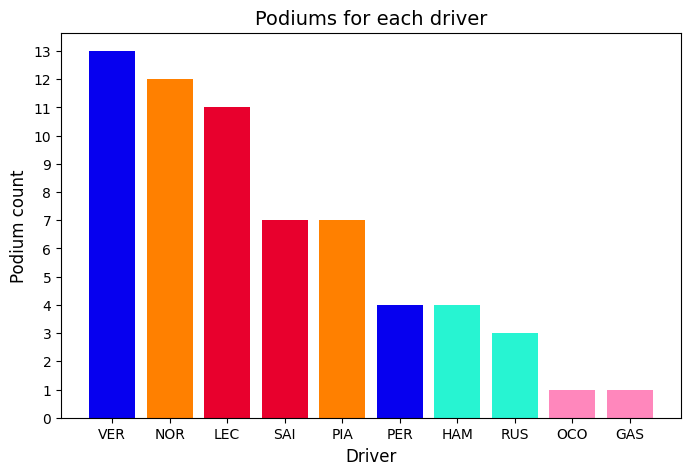

In [59]:
get_season_podiums()

Can input the name of the drivers to compare. Also make a bar chart of the podiums (improve how it looks) or a better type of visualisation. Depends on general framework (driver-team-drivers-season)

### Qualifying

In [46]:
# #If I just input quali_df = results_df, I will find the 1st place grid positions, not pole positions
# quali_df = results_df.copy()

In [3]:
quali_df = pd.read_csv('data/gps_2024_season_quali.csv')

In [4]:
quali_df = quali_df[['Abbreviation', 'Position', 'EventName']]
quali_df = quali_df.rename(columns={'Abbreviation': 'Driver'})
quali_df.head()

,Driver,Position,EventName
0,VER,1.0,Bahrain Grand Prix
1,LEC,2.0,Bahrain Grand Prix
2,RUS,3.0,Bahrain Grand Prix
3,SAI,4.0,Bahrain Grand Prix
4,PER,5.0,Bahrain Grand Prix


#### Qualifying performance

In [5]:
quali_per_df = quali_df.copy()
quali_per_df.sample(5)

,Driver,Position,EventName
33,RIC,14.0,Saudi Arabian Grand Prix
351,PER,13.0,Singapore Grand Prix
192,STR,14.0,Spanish Grand Prix
95,MAG,17.0,Chinese Grand Prix
296,ZHO,18.0,Dutch Grand Prix


In [6]:
driver_list = ['NOR', 'PIA']
quali_per_df = quali_per_df[quali_per_df['Driver'].isin(driver_list)]
quali_per_df.head()

,Driver,Position,EventName
6,NOR,7.0,Bahrain Grand Prix
7,PIA,8.0,Bahrain Grand Prix
24,PIA,5.0,Saudi Arabian Grand Prix
25,NOR,6.0,Saudi Arabian Grand Prix
43,NOR,4.0,Australian Grand Prix


The pivot function in pandas is used to reshape the DataFrame, essentially transforming or "pivoting" the data such that unique values from one column become new columns, while other columns are used as row indices.

In [8]:
# Pivot the DataFrame for easier comparison by EventName
pivoted = quali_per_df.pivot(index='EventName', columns='Driver', values='Position')

In [9]:
pivoted.head()

Driver,NOR,PIA
EventName,,
Australian Grand Prix,4.0,6.0
Austrian Grand Prix,2.0,7.0
Azerbaijan Grand Prix,16.0,2.0
Bahrain Grand Prix,7.0,8.0
Belgian Grand Prix,5.0,6.0


In [10]:
# Add a column to indicate which driver has the lower position
pivoted['BetterDriver'] = pivoted.idxmin(axis=1)  # Find the driver with the minimum position

In [11]:
outquali_df = pd.DataFrame(pivoted['BetterDriver'].value_counts())
outquali_df = outquali_df.reset_index()
outquali_df

,BetterDriver,count
0,NOR,18
1,PIA,4


In [12]:
better_driver = outquali_df.loc[outquali_df['count'].idxmax(), 'BetterDriver']
better_driver

'NOR'

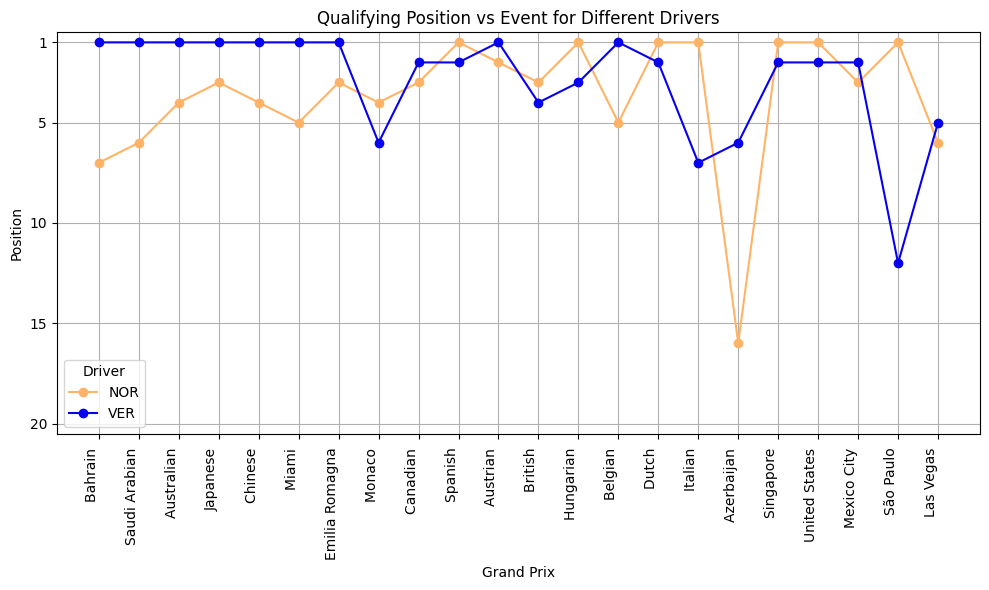

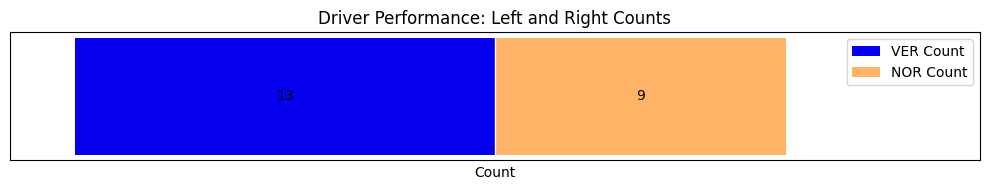

In [8]:
compare_quali_season(['VER', 'NOR'])

#### Highest number of pole positions this season?

In [34]:
pol_df = quali_df.copy()
pol_df = pol_df[pol_df['Position'] == 1]
pol_df.sample(5)

,Driver,Position,EventName
159,RUS,1.0,Canadian Grand Prix
139,LEC,1.0,Monaco Grand Prix
419,RUS,1.0,Las Vegas Grand Prix
359,NOR,1.0,United States Grand Prix
399,NOR,1.0,São Paulo Grand Prix


In [35]:
pol_df = pd.DataFrame(pol_df['Driver'].value_counts())
pol_df = pol_df.reset_index()

In [36]:
pol_df.idxmax().values[0]

np.int64(0)

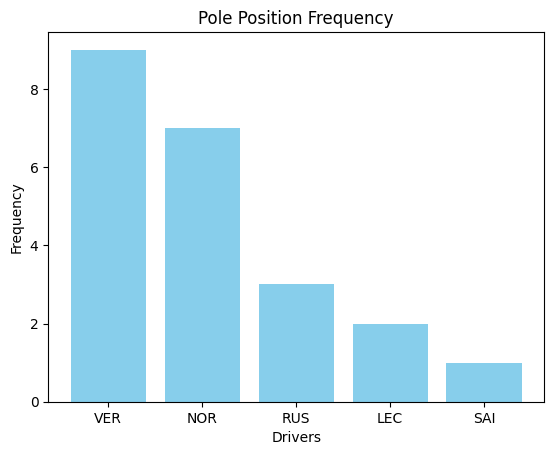

In [41]:
# Extract keys (drivers) and values (frequencies)
drivers = pol_df['Driver']
counts = pol_df['count']

# Create the bar chart
plt.bar(drivers, counts, color='skyblue')

# Add labels and title
plt.xlabel('Drivers')
plt.ylabel('Frequency')
plt.title('Pole Position Frequency')

# Show the plot
plt.show()